In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField,StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number 
from pyspark.sql.window import Window

In [2]:
spark= SparkSession.builder.appName("IPLapp").getOrCreate()

24/05/08 10:21:32 WARN Utils: Your hostname, Darshans-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.4.49 instead (on interface en0)
24/05/08 10:21:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/08 10:21:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [4]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [5]:
ball_by_ball_df= (spark.read.format("csv")
                  .schema(ball_by_ball_schema)
                  .option("header", "true")
                  .option('dateFormat','M/d/yyyy')
                #   .option("inferSchema","true")
                  .load('archive/Ball_By_Ball.csv'))

In [6]:
ball_by_ball_df.show(5)

24/05/08 10:21:36 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [7]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option('dateFormat','M/d/yyyy').option("header","true").load("archive/Match.csv")


In [8]:
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|2008-04-18|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab| Chennai

In [9]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = (spark.read.schema(player_schema).format("csv").option("header","true")
             .option('dateFormat','M/d/yyyy').load("archive/Player.csv"))


In [10]:
player_df.show(5)

+---------+---------+---------------+----------+--------------+------------------+------------+
|player_sk|player_id|    player_name|       dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----------+--------------+------------------+------------+
|        0|        1|     SC Ganguly|1972-07-08| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|1981-09-27|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|1974-12-19|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|1977-07-15|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|1980-10-17|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----------+--------------+------------------+------------+
only showing top 5 rows



In [11]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("archive/Player_match.csv")


In [12]:
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|        

In [13]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("archive/Team.csv")
     

In [14]:
team_df.show(5)

+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
+-------+-------+--------------------+
only showing top 5 rows



Transformation Start:

In [15]:
# Filter to include only valid deliveries(exclude wide, no balls) for specific analysis
ball_by_ball_df= ball_by_ball_df.filter((col("wides") == 0) & (col("noballs")==0))

# Aggregation Calculate the total and average runs scored in each match and innings
total_and_avg_run = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)
# total_and_avg_run.show()

In [16]:
# Window Function: Calculate running total of runs in each match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df=ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

# ball_by_ball_df.show()

In [17]:
# Conditional Column: Flag for high impact balls(either a wicket or more than 6 runs including extras)

ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored")+ col("extra_runs") > 6) | (col("bowler_wicket") == True ), True ).otherwise(False)
)

In [18]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [19]:
from pyspark.sql.functions import year, month, dayofmonth, when

# extract year, month, and day from the match date for more detailed time based analysis
match_df = match_df.withColumn("Year", year("match_date"))
match_df = match_df.withColumn("Month", month("match_date"))
match_df = match_df.withColumn("Day", dayofmonth("match_date"))


# High margin win: categorizing wins in high, medium and low
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyse the impact of the toss: who wins toss and match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"),"Yes").otherwise("No")
)

# show the enhanced match DataFrame
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|Year|Month|Day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|2008-04-18|       2008|M Chinnaswamy Sta...| Bangalore|       Indi

In [20]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a veteran status based on player's age
player_match_df = player_match_df.withColumn(
    "veteran",
    when( col("age_as_on_match")>=35 , "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate the year since debut
player_match_df = player_match_df.withColumn(
    "year_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+-----------+----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|    veteran|year_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-------------

In [21]:
from pyspark.sql.functions import max,sum, col, when

# show impact players
# if manof mach >=5 and player_team_won then high impact, between 2 and 4 medium impact, else low impact

player_impact_df = player_match_df.groupBy("player_id").agg(
    sum(col("is_manofthematch").cast("int")).alias("man_of_match_count"),
    max(col("isplayers_team_won").cast("int")).alias("team_won")
)


   
player_impact_df = player_impact_df.withColumn(
    "Impact_Player",
    when((col("man_of_match_count")>=5) & (col("team_won")==1),"High Impact")
    .when((col("man_of_match_count")>=2) & (col("man_of_match_count")<5) & (col("team_won")==1), "Medium Impact")
    .otherwise("Low Impact")
)

player_impact_df.show(20)


+---------+------------------+--------+-------------+
|player_id|man_of_match_count|team_won|Impact_Player|
+---------+------------------+--------+-------------+
|      148|              NULL|    NULL|   Low Impact|
|      463|              NULL|    NULL|   Low Impact|
|      496|              NULL|    NULL|   Low Impact|
|      471|              NULL|    NULL|   Low Impact|
|      243|              NULL|    NULL|   Low Impact|
|      392|              NULL|    NULL|   Low Impact|
|       31|              NULL|    NULL|   Low Impact|
|       85|              NULL|    NULL|   Low Impact|
|      137|              NULL|    NULL|   Low Impact|
|      251|              NULL|    NULL|   Low Impact|
|      451|              NULL|    NULL|   Low Impact|
|       65|              NULL|    NULL|   Low Impact|
|      458|              NULL|    NULL|   Low Impact|
|       53|              NULL|    NULL|   Low Impact|
|      255|              NULL|    NULL|   Low Impact|
|      481|              NUL

In [22]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [23]:
top_scoring_batsman_per_season = spark.sql("""
SELECT p.player_name,
m.season_year,
SUM(b.runs_scored) as total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p on p.player_id=pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC 
""")

In [24]:
top_scoring_batsman_per_season.show(20)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     SE Marsh|       2008|       614|
|    G Gambhir|       2008|       532|
|ST Jayasuriya|       2008|       508|
|    SR Watson|       2008|       463|
|     GC Smith|       2008|       437|
| AC Gilchrist|       2008|       431|
|    YK Pathan|       2008|       430|
|     SK Raina|       2008|       420|
|     MS Dhoni|       2008|       414|
|    RG Sharma|       2008|       399|
|     V Sehwag|       2008|       399|
|     R Dravid|       2008|       370|
|   SC Ganguly|       2008|       349|
|     S Dhawan|       2008|       340|
|KC Sangakkara|       2008|       319|
|    DJ Hussey|       2008|       318|
|   RV Uthappa|       2008|       316|
|  SA Asnodkar|       2008|       311|
| Yuvraj Singh|       2008|       299|
|     PA Patel|       2008|       297|
+-------------+-----------+----------+
only showing top 20 rows



In [25]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 120
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|SMSM Senanayake|0.8492063492063492|            0|
|      SP Narine| 0.929718875502008|            0|
|     GD McGrath|0.9324324324324325|            0|
|     SL Malinga|0.9407630522088354|            0|
|  Sohail Tanvir| 0.946969696969697|            0|
|     A Chandila|0.9513888888888888|            0|
|      DP Nannes|0.9532163742690059|            0|
|        B Kumar|0.9561487130600572|            0|
|  BW Hilfenhaus|            0.9625|            0|
|      R Rampaul|0.9629629629629629|            0|
|       DW Steyn|0.9700374531835206|            0|
|       R Ashwin|0.9729344729344729|            0|
|       A Mishra|               1.0|            0|
|     SM Pollock|1.0049019607843137|            0|
|   Ankit Sharma|1.0072463768115942|            0|
|      RJ Harris|1.0093896713615023|            0|
|     WPUJC Vaas|1.015151515151

In [28]:
toss_impact_individual_matches= spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
    CASE WHEN m.toss_winner=m.match_winner THEN 'WON' ELSE 'LOST' END AS match_outcome
FROM 
match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")

toss_impact_individual_matches.show(5)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         LOST|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          WON|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         LOST|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         LOST|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         LOST|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



In [59]:
average_runs_in_win = spark.sql("""
SELECT 
p.player_name, pm.player_team, p.batting_hand, p.bowling_skill, p.country_name, pm.veteran, AVG(b.runs_scored) as avg_runs_in_wins, COUNT(*) as innings_played,
(SUM(b.runs_scored)/SUM(CASE WHEN b.extra_type NOT IN ('wide','no ball') THEN 1 ELSE 0 END)*100) as strike_rate
FROM
ball_by_ball b
JOIN player_match pm ON b.match_id=pm.match_id AND b.striker=pm.player_id
JOIN player p ON pm.player_id=p.player_id
JOIN match m ON pm.match_id=m.match_id
WHERE m.match_winner=pm.player_team
GROUP BY p.player_name,pm.player_team, p.batting_hand, p.bowling_skill, p.country_name, pm.veteran
ORDER BY avg_runs_in_wins DESC
""")

average_runs_in_win.show(10)

+---------------+--------------------+--------------+--------------------+------------+-----------+------------------+--------------+------------------+
|    player_name|         player_team|  batting_hand|       bowling_skill|country_name|    veteran|  avg_runs_in_wins|innings_played|       strike_rate|
+---------------+--------------------+--------------+--------------------+------------+-----------+------------------+--------------+------------------+
|    Rashid Khan| Sunrisers Hyderabad|Right-hand bat|     Legbreak googly| Afghanistan|Non-Veteran|               6.0|             1|             600.0|
|Y Venugopal Rao| Sunrisers Hyderabad|Right-hand bat|  Right-arm offbreak|       India|Non-Veteran|               4.0|             1|             400.0|
|       RV Gomez|       Pune Warriors|Right-hand bat|    Right-arm medium|       India|Non-Veteran|               4.0|             1|             400.0|
|  Shahid Afridi|     Deccan Chargers|Right-hand bat|     Legbreak googly|    Paki

In [36]:
import matplotlib.pyplot as plt

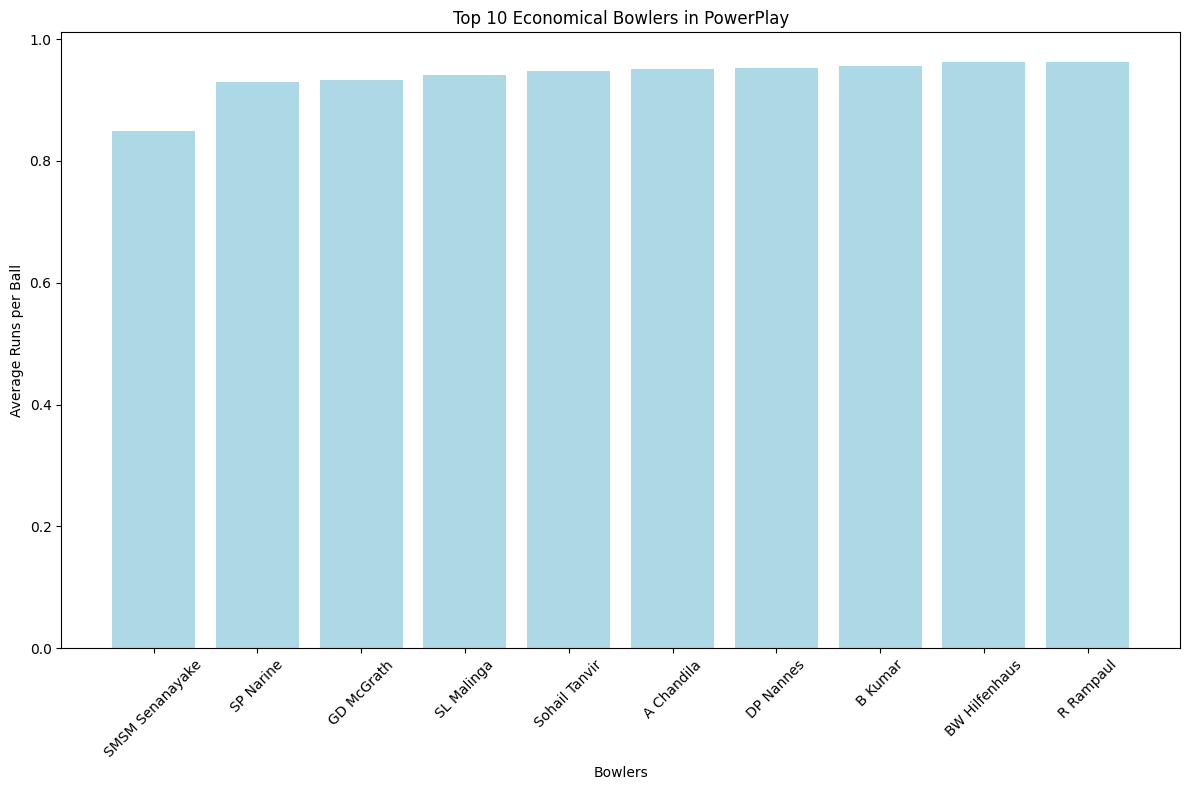

In [43]:
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

plt.figure(figsize=(12,8))
# limiting to top10
top_economic_bowlers = economical_bowlers_pd.nsmallest(10,"avg_runs_per_ball")
plt.bar(top_economic_bowlers["player_name"],top_economic_bowlers["avg_runs_per_ball"], color= 'lightblue')
plt.xlabel("Bowlers")
plt.ylabel("Average Runs per Ball")
plt.title("Top 10 Economical Bowlers in PowerPlay")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
import seaborn as sns

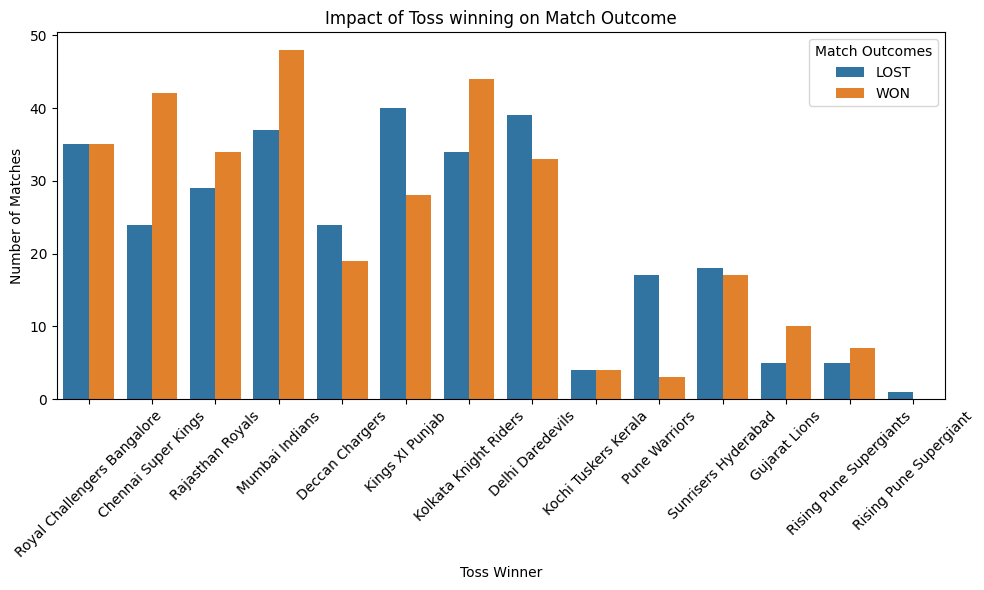

In [55]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

plt.figure(figsize=(10,6))
sns.countplot(x='toss_winner',hue='match_outcome' ,data=toss_impact_pd)
plt.title('Impact of Toss winning on Match Outcome')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcomes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

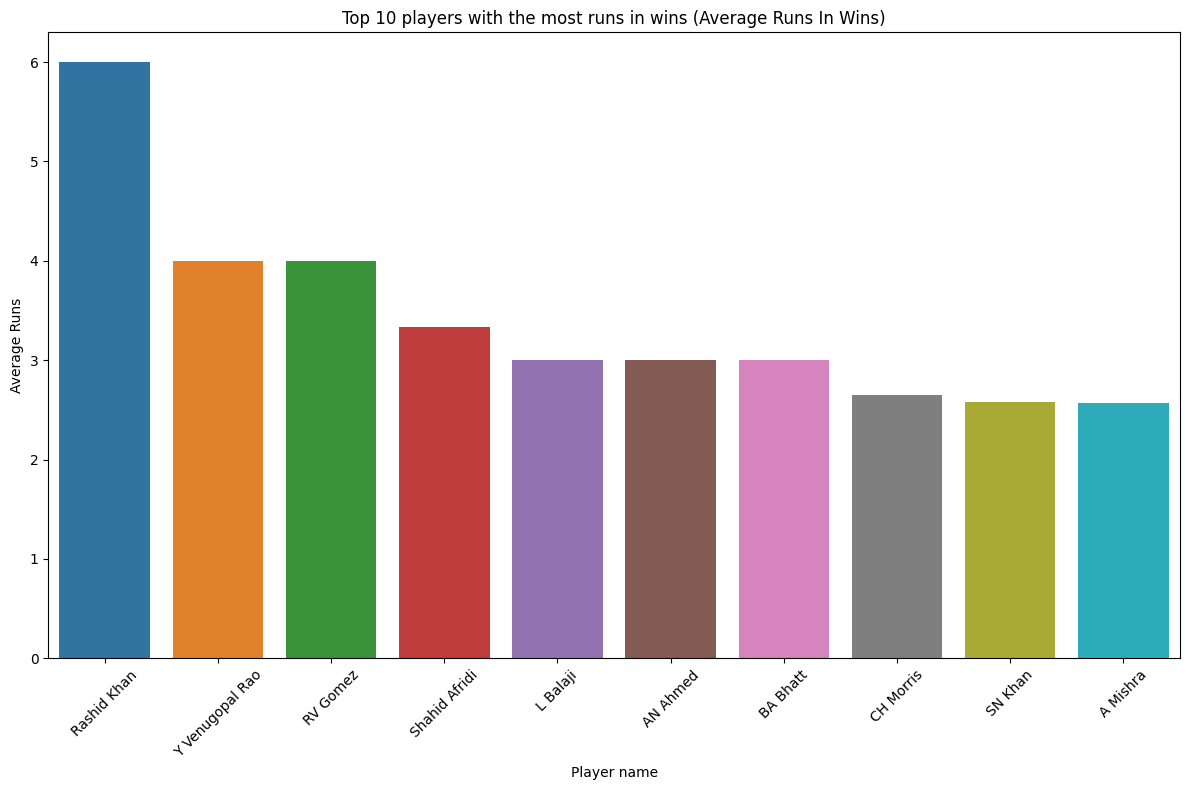

In [65]:
average_runs_pd = average_runs_in_win.toPandas()

plt.figure(figsize=(12,8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Top 10 players with the most runs in wins (Average Runs In Wins)')
plt.xlabel('Player name')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
scores_by_venue = spark.sql("""
SELECT m1.venue_name, m1.city_name, AVG(m1.runs_scored) as avg_runs, MAX(m1.runs_scored) as highest_score
FROM
(SELECT m.match_id,m.venue_name,m.city_name, (SUM(b.runs_scored)) as runs_scored
FROM
match m
JOIN ball_by_ball b ON m.match_id=b.match_id
GROUP BY m.match_id,m.venue_name,m.city_name) m1
                            
GROUP BY m1.venue_name, m1.city_name
ORDER BY avg_runs DESC
""")

scores_by_venue.show(10)

+--------------------+------------------+------------------+-------------+
|          venue_name|         city_name|          avg_runs|highest_score|
+--------------------+------------------+------------------+-------------+
|   Brabourne Stadium|            Mumbai| 325.8181818181818|          399|
|Saurashtra Cricke...|            Rajkot|             319.1|          393|
|Punjab Cricket As...|        Chandigarh|317.42857142857144|          341|
|    Barabati Stadium|           Cuttack|311.57142857142856|          404|
|          Green Park|            Kanpur|             308.0|          378|
|Maharashtra Crick...|              Pune|302.06666666666666|          377|
|Rajiv Gandhi Inte...|Hyderabad (Deccan)|             302.0|          365|
|Himachal Pradesh ...|        Dharamsala| 301.1111111111111|          371|
|MA Chidambaram St...|           Chennai| 299.7291666666667|          447|
|M Chinnaswamy Sta...|         Bangalore|298.91379310344826|          387|
+--------------------+---

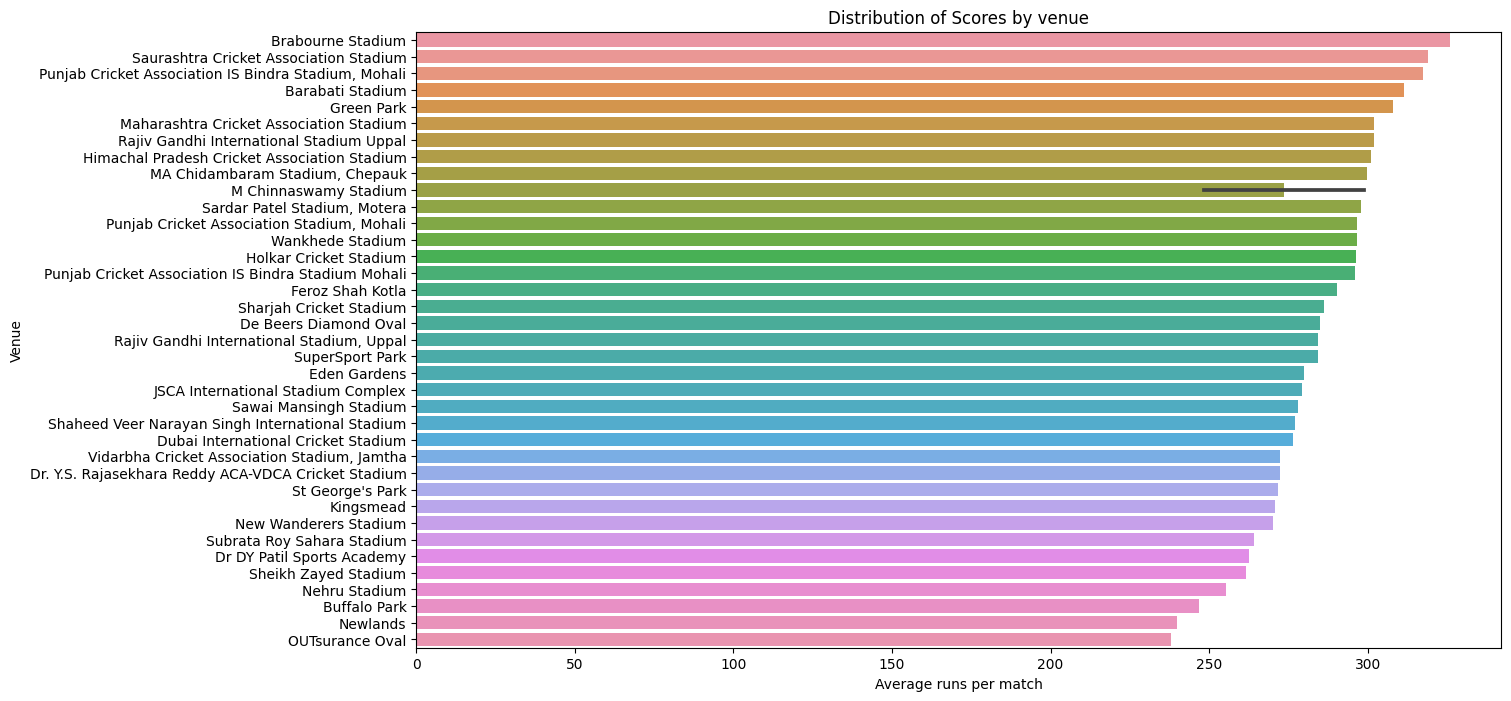

In [73]:
scores_by_venue_pd= scores_by_venue.toPandas()

plt.figure(figsize=(14,8))
sns.barplot(x='avg_runs', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by venue')
plt.xlabel("Average runs per match")
plt.ylabel("Venue")
plt.show()

In [76]:
dismissal_types = spark.sql("""
SELECT out_type, count(*) as frequency
FROM
ball_by_ball
WHERE out_type IS NOT NULL and out_type<>'Not Applicable'
GROUP BY out_type
ORDER BY frequency DESC
""")

dismissal_types.show(5)

+------------+---------+
|    out_type|frequency|
+------------+---------+
|      caught|     3678|
|      bowled|     1382|
|     run out|      744|
|Keeper Catch|      695|
|         lbw|      455|
+------------+---------+
only showing top 5 rows



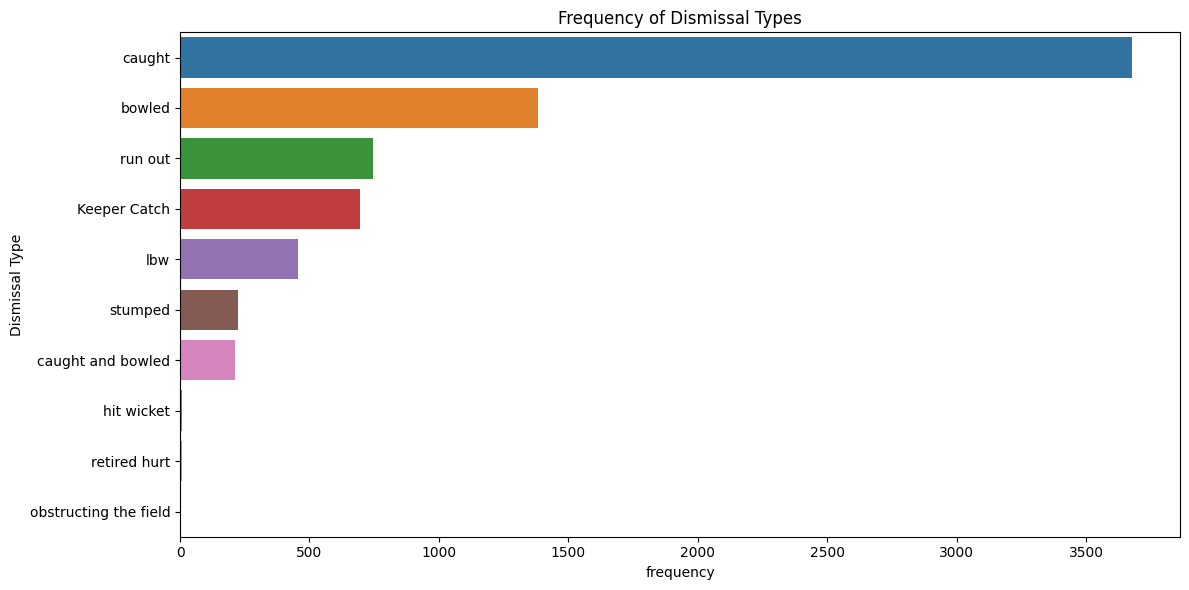

In [80]:
dismissal_types_pd = dismissal_types.toPandas()

plt.figure(figsize=(12,6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd)
plt.title('Frequency of Dismissal Types')
plt.ylabel("Dismissal Type")
plt.tight_layout()
plt.show()

In [82]:
team_toss_win_perf = spark.sql("""
SELECT team1, COUNT(*) as no_of_mactches_played, SUM(CASE WHEN toss_winner=match_winner THEN 1 ELSE 0 END) as wins_after_toss
FROM
match 
WHERE toss_winner=team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

team_toss_win_perf.show(5)

+--------------------+---------------------+---------------+
|               team1|no_of_mactches_played|wins_after_toss|
+--------------------+---------------------+---------------+
| Chennai Super Kings|                   37|             27|
|      Mumbai Indians|                   42|             26|
|Kolkata Knight Ri...|                   36|             24|
|Royal Challengers...|                   34|             19|
|    Delhi Daredevils|                   36|             17|
+--------------------+---------------------+---------------+
only showing top 5 rows



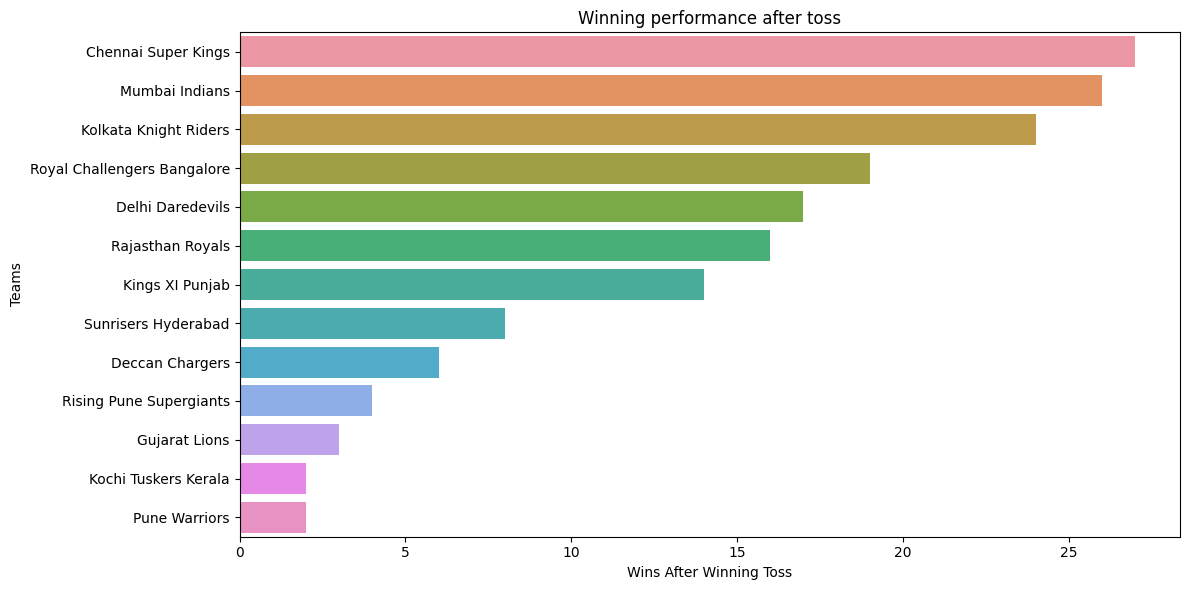

In [84]:
team_toss_win_perf_pd = team_toss_win_perf.toPandas()

plt.figure(figsize=(12,6))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_perf_pd)
plt.title('Winning performance after toss')
plt.ylabel("Teams")
plt.xlabel("Wins After Winning Toss")
plt.tight_layout()
plt.show()

REFERENCE : https://github.com/darshilparmar/ipl-data-analysis-apache-spark-project/blob/main/IPL_DATA_ANALYSIS_SPARK.ipynb